In [41]:
# KNN Classification
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
#read data
df=pd.read_csv("E:\\materials\\Assignment\\Assignment13\\glass.csv")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [5]:
X = np.array(df.iloc[:, 3:5])
Y = np.array(df['Type'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3)

In [25]:
n_neighbors = numpy.array(range(1,30))
param_grid = dict(n_neighbors=n_neighbors)

In [26]:
model = KNeighborsClassifier()          
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [27]:
print(grid.best_score_)
print(grid.best_params_)

0.6441379310344827
{'n_neighbors': 6}


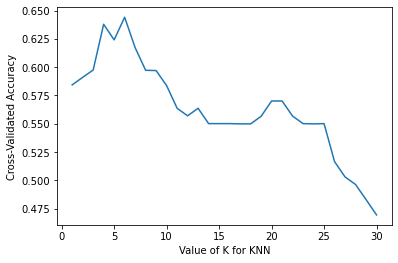

In [32]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [33]:
model =  KNeighborsClassifier(n_neighbors=1)

In [36]:
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [37]:
pred = model.predict(X_test)

In [42]:
score = accuracy_score(pred,y_test)

In [43]:
score

0.5692307692307692